Prediction of Wine Quality:
Project by: Himanshu Mittal


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Prediction of Wine Quality/wines.csv')

In [ ]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280-OD315_of_diluted_wines  178 non-null    float64
 13  Proli

In [ ]:
#overview of dataset
df.head()

Class  Alcohol  Malic_acid  ...   Hue  OD280-OD315_of_diluted_wines  Proline
0      1    14.23        1.71  ...  1.04                          3.92     1065
1      1    13.20        1.78  ...  1.05                          3.40     1050
2      1    13.16        2.36  ...  1.03                          3.17     1185
3      1    14.37        1.95  ...  0.86                          3.45     1480
4      1    13.24        2.59  ...  1.04                          2.93      735

[5 rows x 14 columns]

In [ ]:
#for statistical analysis
df.describe()

Class     Alcohol  ...  OD280-OD315_of_diluted_wines      Proline
count  178.000000  178.000000  ...                    178.000000   178.000000
mean     1.938202   13.000618  ...                      2.611685   746.893258
std      0.775035    0.811827  ...                      0.709990   314.907474
min      1.000000   11.030000  ...                      1.270000   278.000000
25%      1.000000   12.362500  ...                      1.937500   500.500000
50%      2.000000   13.050000  ...                      2.780000   673.500000
75%      3.000000   13.677500  ...                      3.170000   985.000000
max      3.000000   14.830000  ...                      4.000000  1680.000000

[8 rows x 14 columns]

###**EDA**

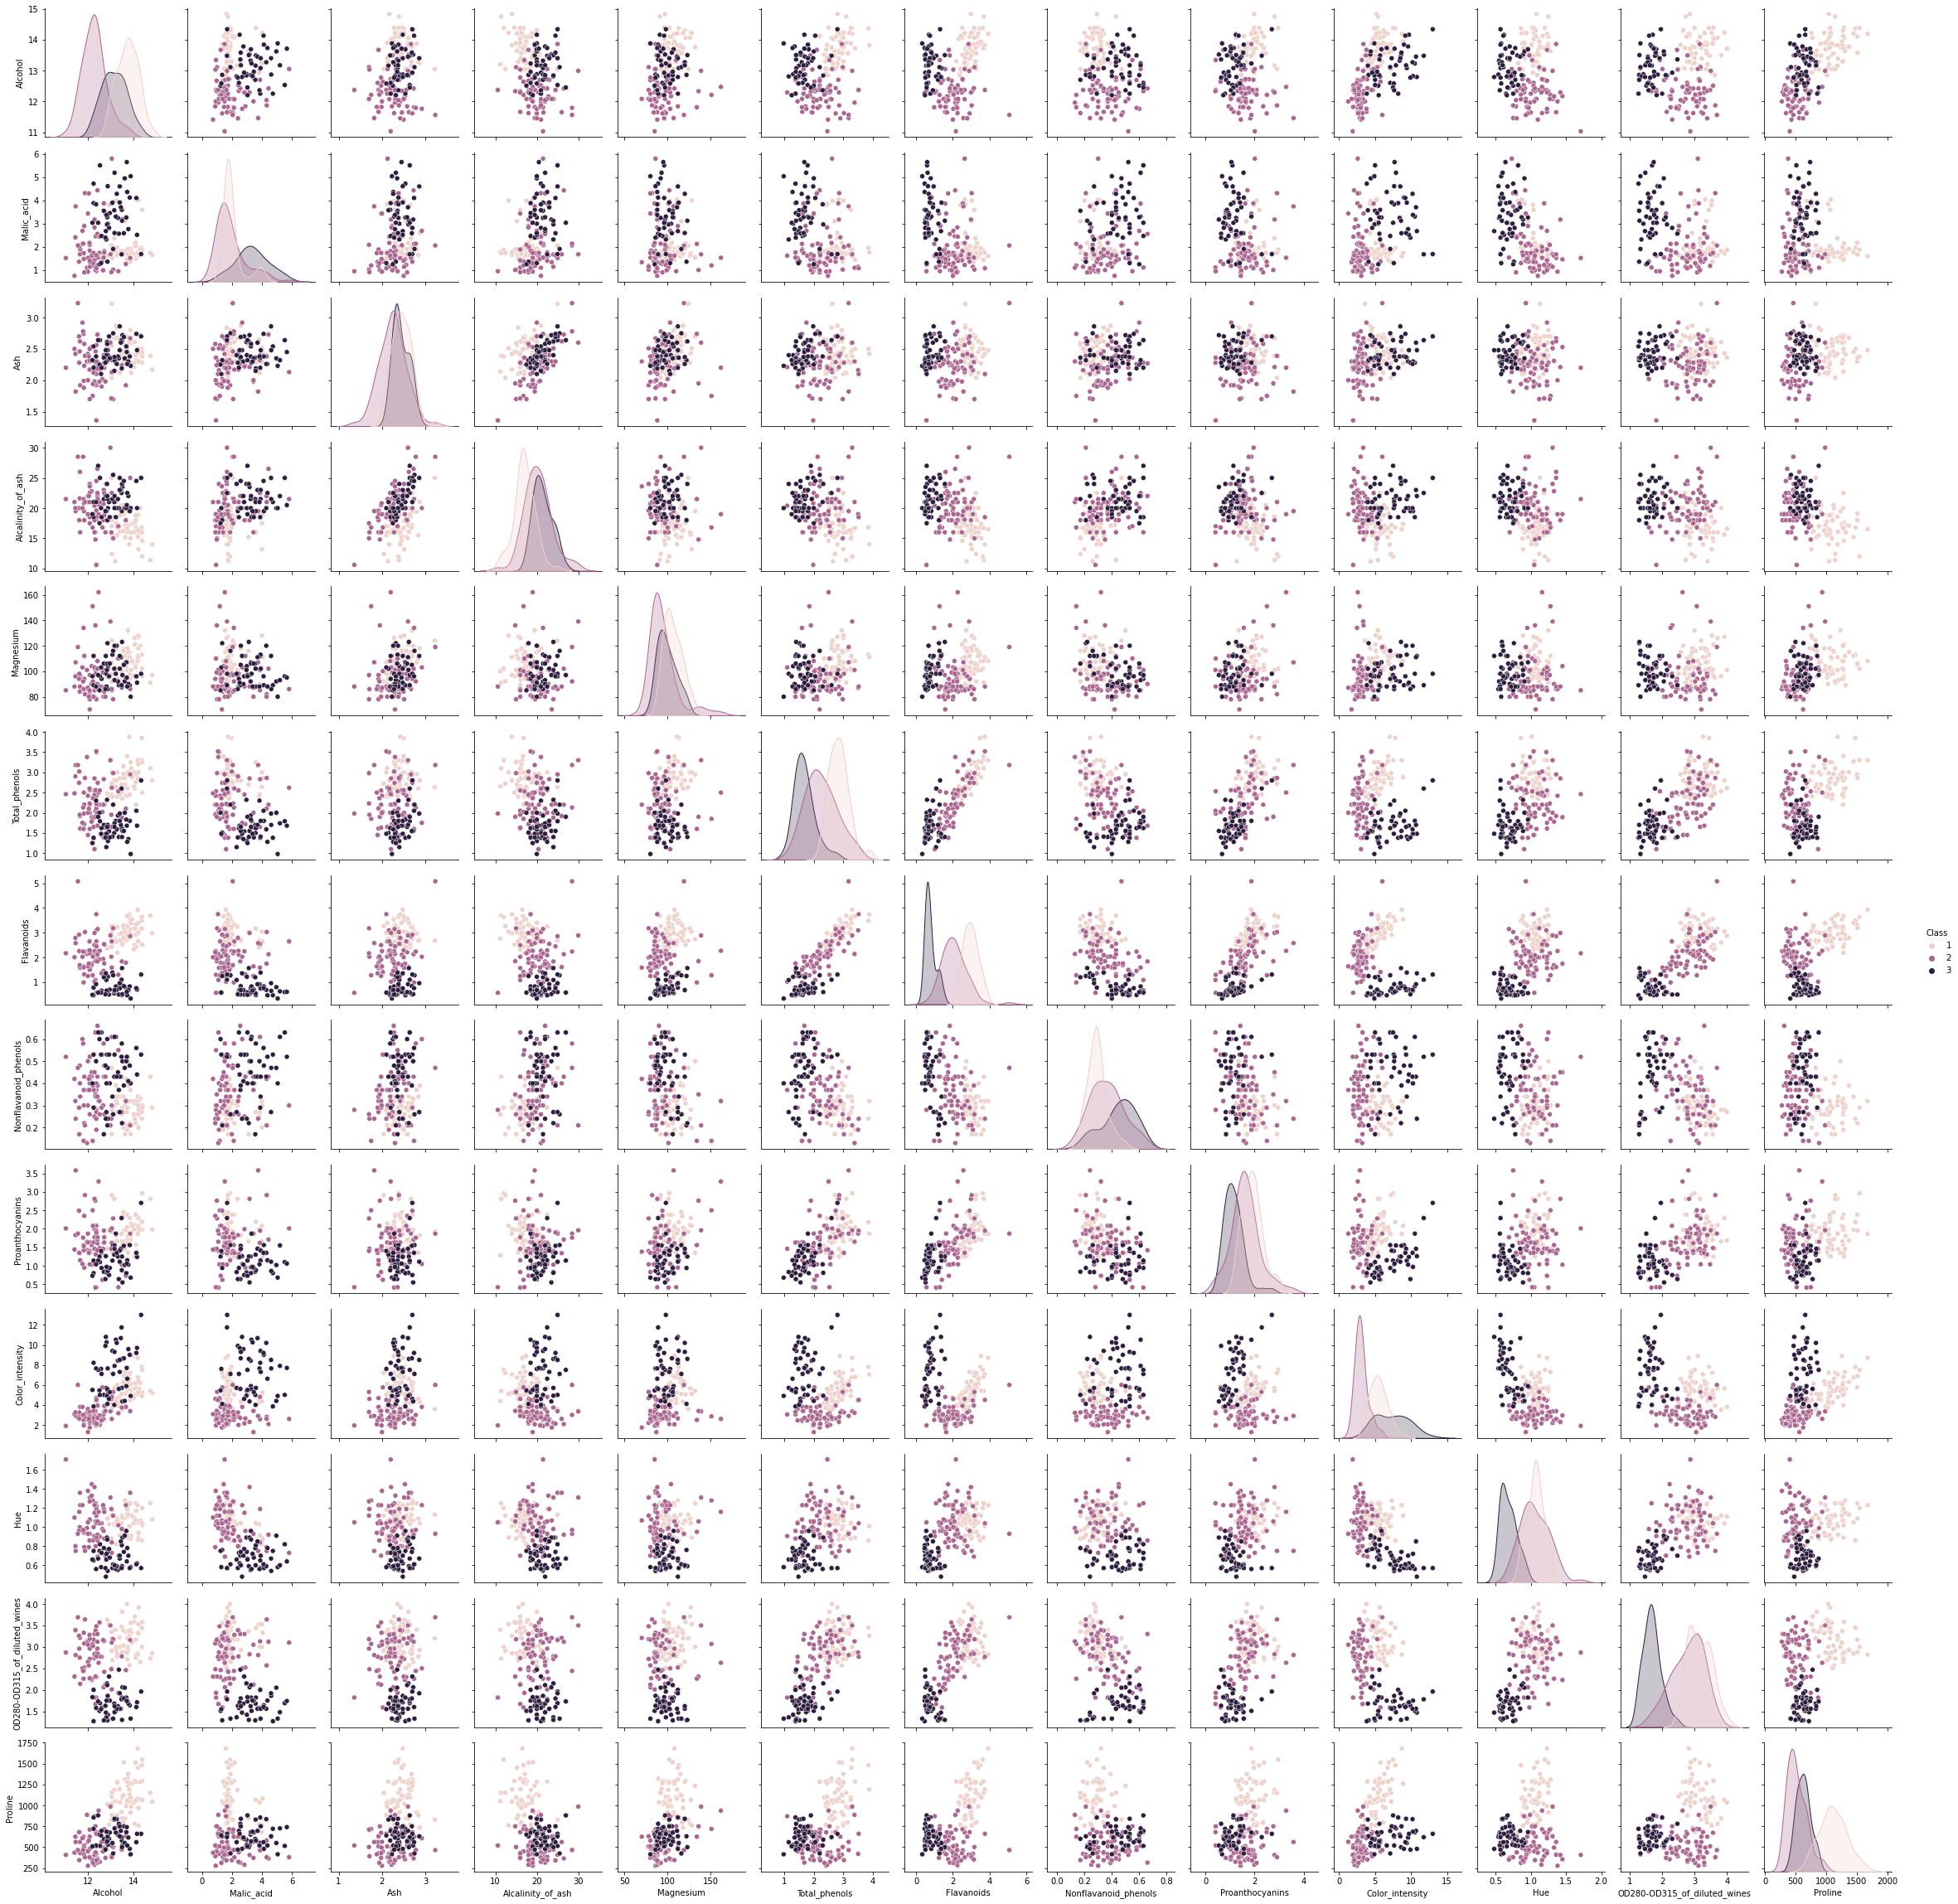

In [ ]:
#Relationship between all the pair of columns
sns.pairplot(data=df, kind='scatter', diag_kind='kde', hue='Class')

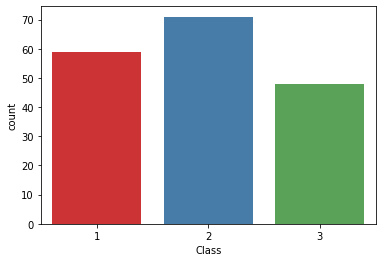

In [ ]:
sns.countplot(x=df['Class'],palette="Set1")

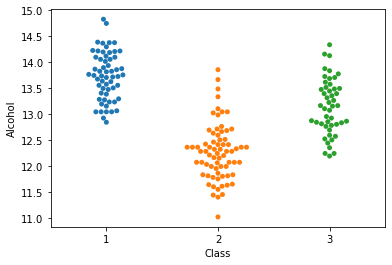

In [ ]:
sns.swarmplot(x=df['Class'], y=df['Alcohol'])

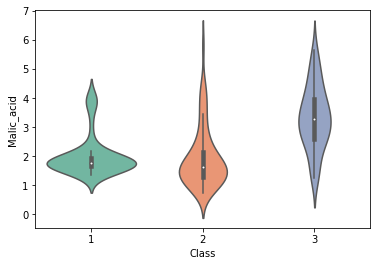

In [ ]:
sns.violinplot(x=df['Class'], y=df['Malic_acid'],palette='Set2')

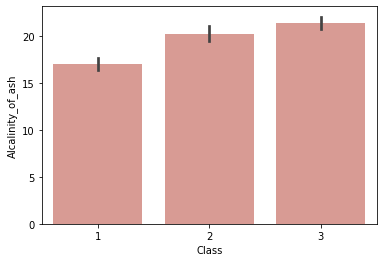

In [ ]:
sns.barplot(x=df['Class'], y=df['Alcalinity_of_ash'],color="salmon", saturation=.5)

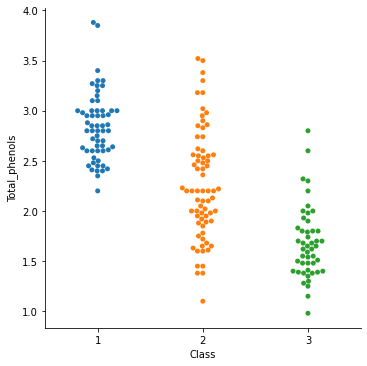

In [ ]:
sns.catplot(x=df['Class'], y=df['Total_phenols'], kind="swarm", data=df)

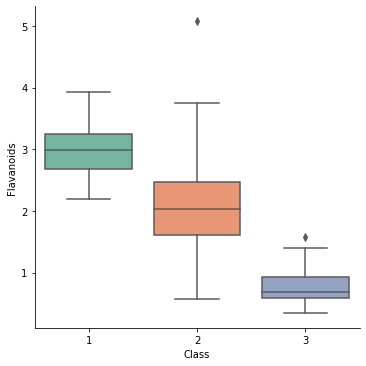

In [ ]:
sns.catplot(x=df['Class'], y=df['Flavanoids'], kind="box", data=df,palette="Set2")

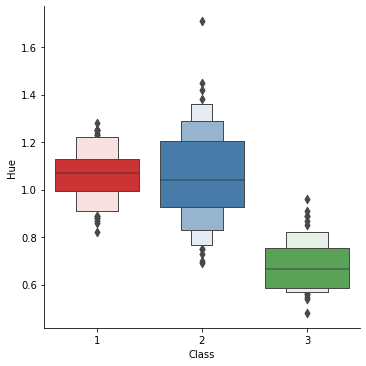

In [ ]:
sns.catplot(x=df['Class'], y=df['Hue'], kind="boxen",data=df.sort_values("Class"),palette="Set1")

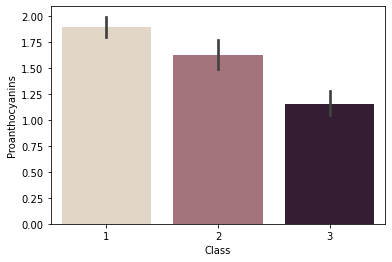

In [ ]:
sns.barplot(x=df['Class'], y=df['Proanthocyanins'], palette="ch:.25", data=df)

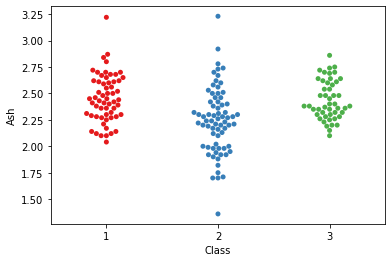

In [ ]:
sns.swarmplot(x=df['Class'], y=df['Ash'], data=df,palette="Set1")

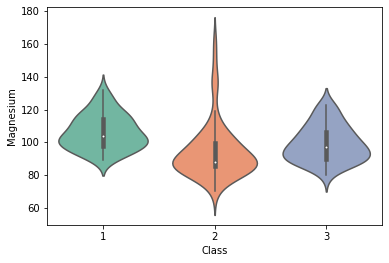

In [ ]:
sns.violinplot(x=df['Class'], y=df['Magnesium'], data=df,palette="Set2")

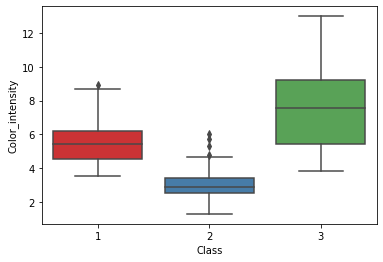

In [ ]:
sns.boxplot(x=df['Class'], y=df['Color_intensity'], data=df,palette="Set1")

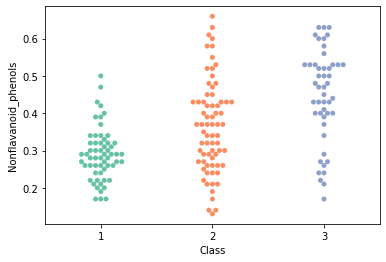

In [ ]:
sns.swarmplot(x=df['Class'], y=df['Nonflavanoid_phenols'], data=df,palette="Set2")

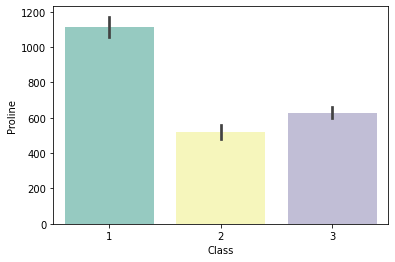

In [ ]:
sns.barplot(x=df['Class'], y=df['Proline'], data=df,palette="Set3")

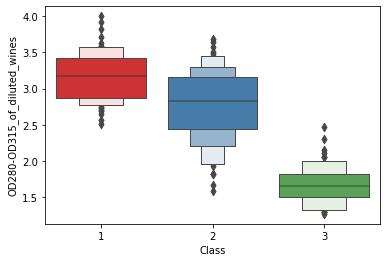

In [ ]:
sns.boxenplot(x=df['Class'], y=df['OD280-OD315_of_diluted_wines'], data=df,palette="Set1")

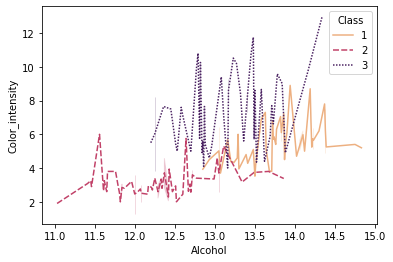

In [ ]:
sns.lineplot(x=df['Alcohol'], y=df['Color_intensity'], hue=df['Class'], style=df['Class'],palette="flare")

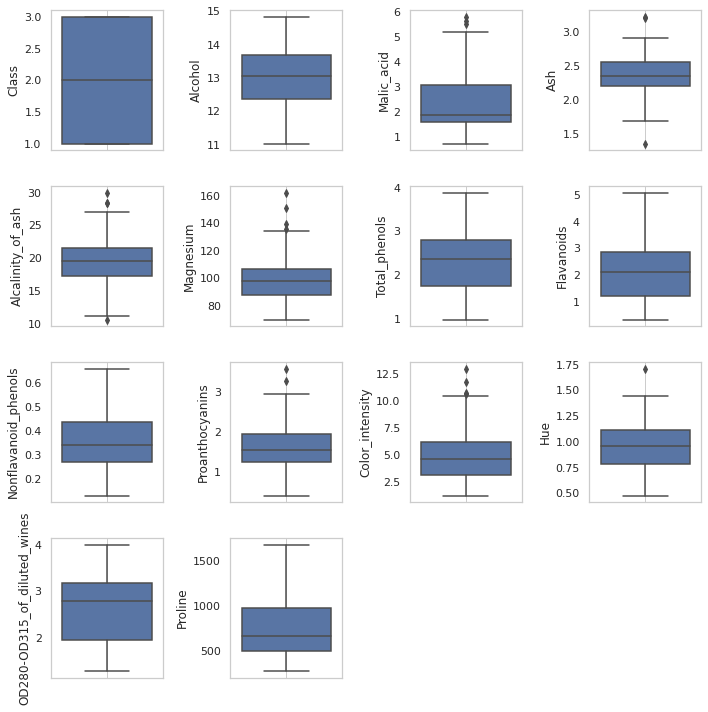

In [ ]:
#Boxplot of all the columns for statistical analysis
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
for j,attr in enumerate(list(df.columns.values)):
  plt.subplot(4,4,(j+1))
  sns.boxplot(y=df[attr])
  plt.grid()
  plt.tight_layout()

In [ ]:
##handling outliers
for j,attr in enumerate(list(df.columns.values)):
        quar1=df[attr].quantile(0.25)
        quar3=df[attr].quantile(0.75)
        iqr=quar3-quar1
        lower = quar1-1.5*iqr
        upper = quar3+1.5*iqr
        df = df[df[attr]< upper]

In [ ]:
#Information about dataset after handling outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         159 non-null    int64  
 1   Alcohol                       159 non-null    float64
 2   Malic_acid                    159 non-null    float64
 3   Ash                           159 non-null    float64
 4   Alcalinity_of_ash             159 non-null    float64
 5   Magnesium                     159 non-null    int64  
 6   Total_phenols                 159 non-null    float64
 7   Flavanoids                    159 non-null    float64
 8   Nonflavanoid_phenols          159 non-null    float64
 9   Proanthocyanins               159 non-null    float64
 10  Color_intensity               159 non-null    float64
 11  Hue                           159 non-null    float64
 12  OD280-OD315_of_diluted_wines  159 non-null    float64
 13  Proli

In [ ]:
#correlation between columns
corr = df[df.columns].corr()
corr

Class  ...   Proline
Class                         1.000000  ... -0.643127
Alcohol                      -0.376652  ...  0.654454
Malic_acid                    0.450041  ... -0.159610
Ash                          -0.087428  ...  0.292650
Alcalinity_of_ash             0.548472  ... -0.436945
Magnesium                    -0.267487  ...  0.455793
Total_phenols                -0.752508  ...  0.525081
Flavanoids                   -0.877871  ...  0.534444
Nonflavanoid_phenols          0.499000  ... -0.309788
Proanthocyanins              -0.606460  ...  0.390786
Color_intensity               0.220837  ...  0.365684
Hue                          -0.629746  ...  0.222093
OD280-OD315_of_diluted_wines -0.796548  ...  0.333614
Proline                      -0.643127  ...  1.000000

[14 rows x 14 columns]

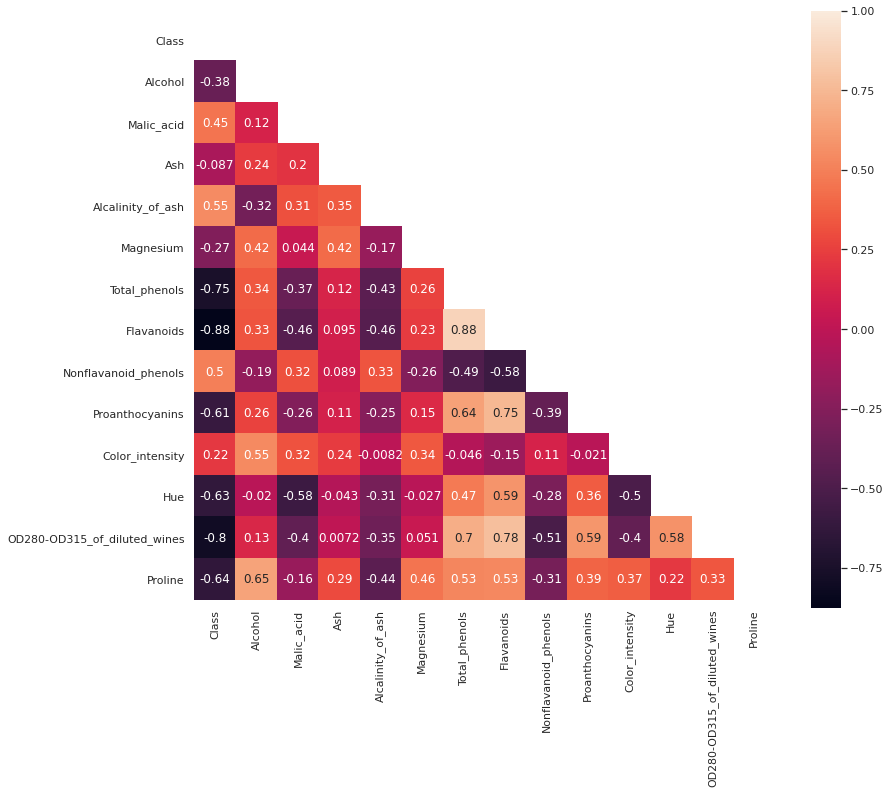

In [ ]:
#heatmap of the correlation
hide = np.zeros_like(corr)
hide[np.triu_indices_from(hide)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 11))
    ax = sns.heatmap(corr,mask=hide, vmax=1, square=True,annot=True)

In [ ]:
#as its correlation is only -0.05
X=df.drop('Ash',axis=1)

In [ ]:
#as it is to be predicted
X=X.drop(['Class'], axis=1)

In [ ]:
#Class needs to be predicted
y=df['Class']

In [ ]:
#No of rows having respective classes
y.value_counts().sort_index()

1    56
2    61
3    42
Name: Class, dtype: int64

In [ ]:
#Overview of X
X.head()

Alcohol  Malic_acid  ...  OD280-OD315_of_diluted_wines  Proline
0    14.23        1.71  ...                          3.92     1065
1    13.20        1.78  ...                          3.40     1050
2    13.16        2.36  ...                          3.17     1185
3    14.37        1.95  ...                          3.45     1480
4    13.24        2.59  ...                          2.93      735

[5 rows x 12 columns]

In [ ]:
#Information about X
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 0 to 177
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       159 non-null    float64
 1   Malic_acid                    159 non-null    float64
 2   Alcalinity_of_ash             159 non-null    float64
 3   Magnesium                     159 non-null    int64  
 4   Total_phenols                 159 non-null    float64
 5   Flavanoids                    159 non-null    float64
 6   Nonflavanoid_phenols          159 non-null    float64
 7   Proanthocyanins               159 non-null    float64
 8   Color_intensity               159 non-null    float64
 9   Hue                           159 non-null    float64
 10  OD280-OD315_of_diluted_wines  159 non-null    float64
 11  Proline                       159 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 16.1 KB


In [ ]:
#Sum of number of rows having null values in the respective columns
X.isnull().sum()

Alcohol                         0
Malic_acid                      0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280-OD315_of_diluted_wines    0
Proline                         0
dtype: int64

In [ ]:
#Number of null values in y
y.isnull().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Splitting of data for training and testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)


In [ ]:
X_train.shape

(111, 12)

In [ ]:
X_test.shape

(48, 12)

In [ ]:
y_train.shape

(111,)

In [ ]:
y_test.shape

(48,)

In [ ]:
X_train.head()

Alcohol  Malic_acid  ...  OD280-OD315_of_diluted_wines  Proline
91     12.00        1.51  ...                          2.65      450
87     11.65        1.67  ...                          3.21      562
122    12.42        4.43  ...                          3.12      365
11     14.12        1.48  ...                          2.82     1280
118    12.77        3.43  ...                          2.12      372

[5 rows x 12 columns]

In [ ]:
y_train.head()

91     2
87     2
122    2
11     1
118    2
Name: Class, dtype: int64

###**Applying Models**

**1. KNN**

In [ ]:
model1=KNeighborsClassifier(n_neighbors=3)

In [ ]:
model1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
y_pred=model1.predict(X_test)

In [ ]:
y_pred

array([3, 1, 3, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 3, 2, 2, 1, 3, 3,
       1, 1, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 1, 2, 1, 1, 2, 3, 1, 2, 1, 2,
       1, 1, 2, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
#Accuracy
print(accuracy_score(y_test,y_pred))

0.75


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.81      0.94      0.87        18
           2       0.73      0.69      0.71        16
           3       0.67      0.57      0.62        14

    accuracy                           0.75        48
   macro avg       0.74      0.73      0.73        48
weighted avg       0.74      0.75      0.74        48



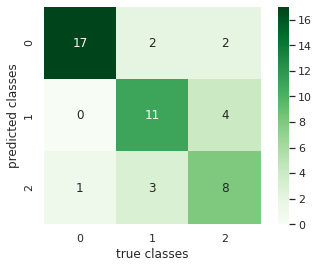

In [ ]:
matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=True,cmap="Greens")
plt.xlabel('true classes')
plt.ylabel('predicted classes')
plt.show()

**2. Naive Bayes**

In [ ]:
#Using Naive Bayes as our model
model=GaussianNB()

In [ ]:
#Fitting the training dataset in model
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Prediction values of the test dataset
y_pred=model.predict(X_test)

In [ ]:
#Predicted Classes
y_pred

array([2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 1, 2, 1, 2, 1, 1, 3, 2, 2, 1, 3, 1,
       1, 1, 1, 3, 2, 2, 3, 3, 3, 2, 2, 3, 1, 2, 1, 1, 2, 3, 1, 3, 3, 2,
       3, 1, 2, 1])

In [ ]:
#Test Classes
y_test

84     2
174    3
142    3
58     1
101    2
31     1
164    3
54     1
105    2
156    3
20     1
63     2
16     1
68     2
26     1
32     1
140    3
108    2
103    2
17     1
169    3
19     1
12     1
9      1
33     1
139    3
102    2
59     2
162    3
170    3
149    3
82     2
81     2
153    3
2      1
92     2
47     1
44     1
72     2
131    3
28     1
152    3
163    3
97     2
70     2
38     1
88     2
23     1
Name: Class, dtype: int64

In [ ]:
#Accuracy
print(accuracy_score(y_test,y_pred))

0.9791666666666666


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      0.94      0.97        16
           3       0.93      1.00      0.97        14

    accuracy                           0.98        48
   macro avg       0.98      0.98      0.98        48
weighted avg       0.98      0.98      0.98        48



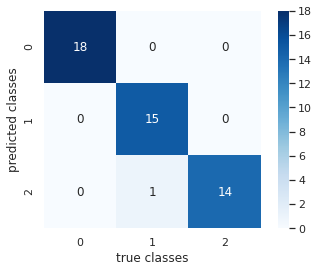

In [ ]:
matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=True,cmap="Blues")
plt.xlabel('true classes')
plt.ylabel('predicted classes')
plt.show()